## **COMMUNITY DETECTION IN FIFA 2020 DATASET**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import seaborn as sns

# Loading the dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH1 = '/content/players_20.csv'
data= pd.read_csv(DATA_PATH1, sep=',')
display(data.head())
print(f'The Data has {data.shape[0]} rows and {data.shape[1]} features')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

The Data has 18278 rows and 104 features


# Data Understanding and Cleaning

In [ ]:
# Taking the first preference of each player's preferred player position
data['player_positions'] = data['player_positions'].str.split(',').str[0]

In [ ]:
# Making a copy of the original dataset before further analysis
copy_of_dataset = data.copy()

In [ ]:
# function to generate samples of the desired player positions
def sample_generate(positions = ['CAM', 'RM', 'CDM', 'LM', 'CM'], n_samples = 10):
    '''
    available unique player positions to be clustered = ['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB']
    '''
    samples = copy_of_dataset[copy_of_dataset.player_positions.isin(positions) & (copy_of_dataset.overall>=70)].sample(n_samples)
    return samples.index.values


Player ratings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


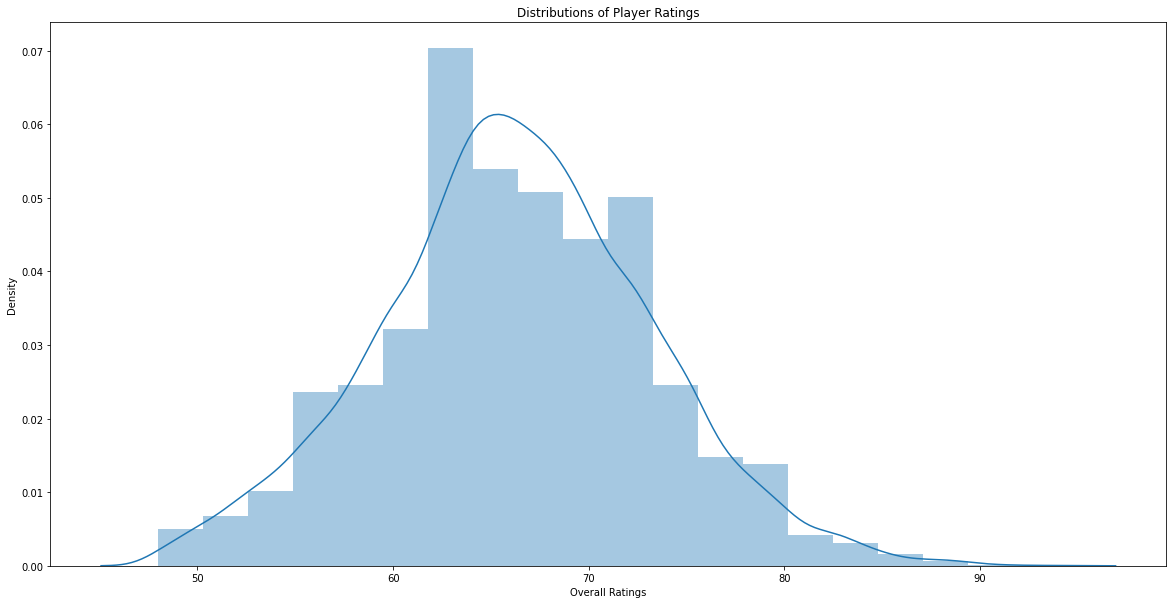

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.overall, bins=20);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

Removing players with rating below 70

In [ ]:
data = data[data.overall>=70]

In [ ]:
pd.DataFrame(data.overall.value_counts().sort_index())

,overall
70,902
71,715
72,753
73,638
74,529
75,506
76,361
77,262
78,239
79,185


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


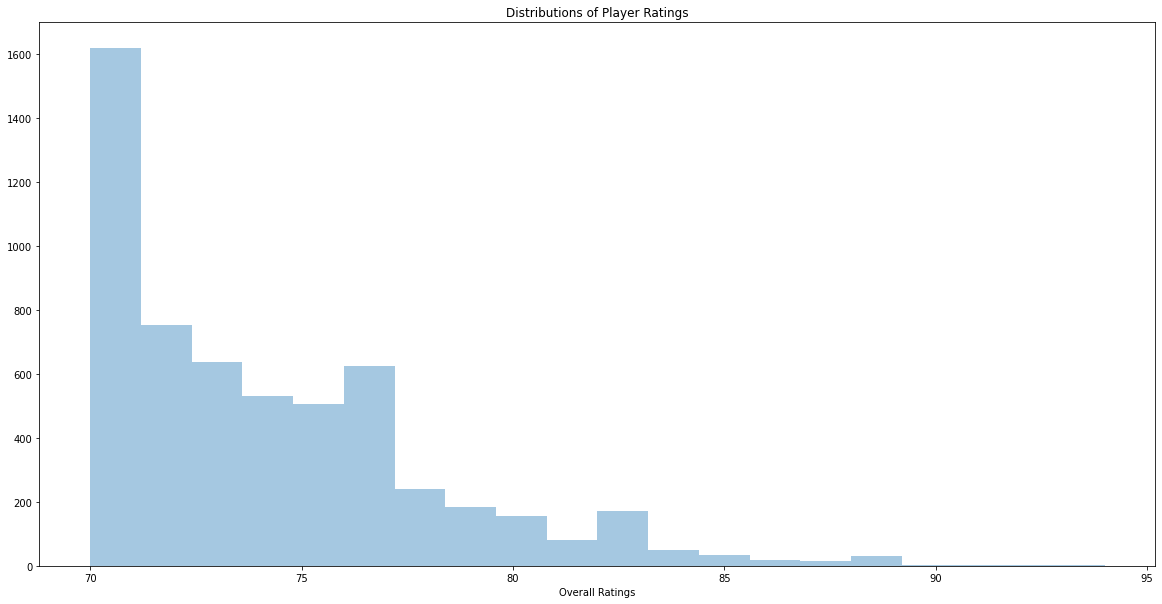

In [ ]:
# Visualizing updated player ratings afer removal
plt.figure(figsize=(20,10))
ax = sns.distplot(data.overall, bins=20,vertical=False,kde=False);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


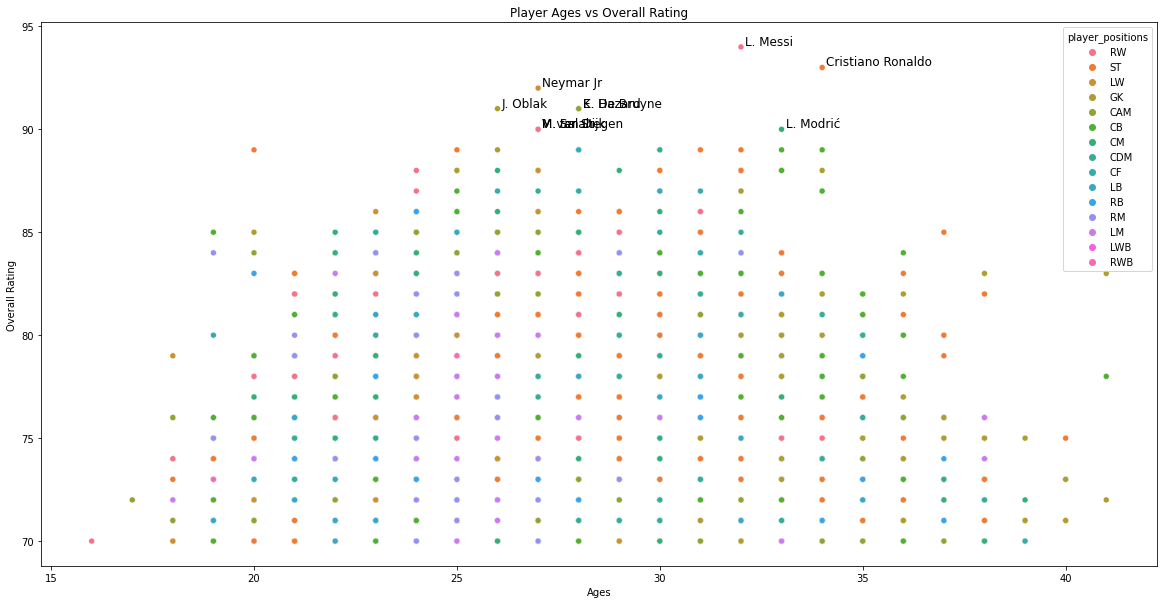

In [ ]:
# Plotting Age Vs Player rating 
plt.figure(figsize=(20,10))
ax = sns.scatterplot('age','overall',hue='player_positions',data=data);
ax.set_title('Player Age vs Overall Rating')
ax.set_xlabel('Age')
ax.set_ylabel('Overall Rating')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if (point['y'] >=90) :
            ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize=12)

label_point( data.age,data.overall, data.short_name, plt.gca())  

Dropping unnecessary features

In [ ]:
to_drop = ['sofifa_id','player_url','long_name','potential','dob',\
           'work_rate','body_type','real_face','release_clause_eur','player_tags',\
           'team_position','team_jersey_number','loaned_from','joined','contract_valid_until',\
           'nation_position','nation_jersey_number','player_traits',\
           'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',\
           'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb', 'value_eur','wage_eur']
data = data.drop(to_drop, axis=1)

In [ ]:
pd.DataFrame(data.dtypes).T

,short_name,age,height_cm,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,object,int64,int64,int64,object,object,int64,object,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


Checking for correlated features using a heatmap

In [ ]:
# Create correlation matrix as the data is still suspected to be highly correlated
corr_matrix = data.corr().abs()

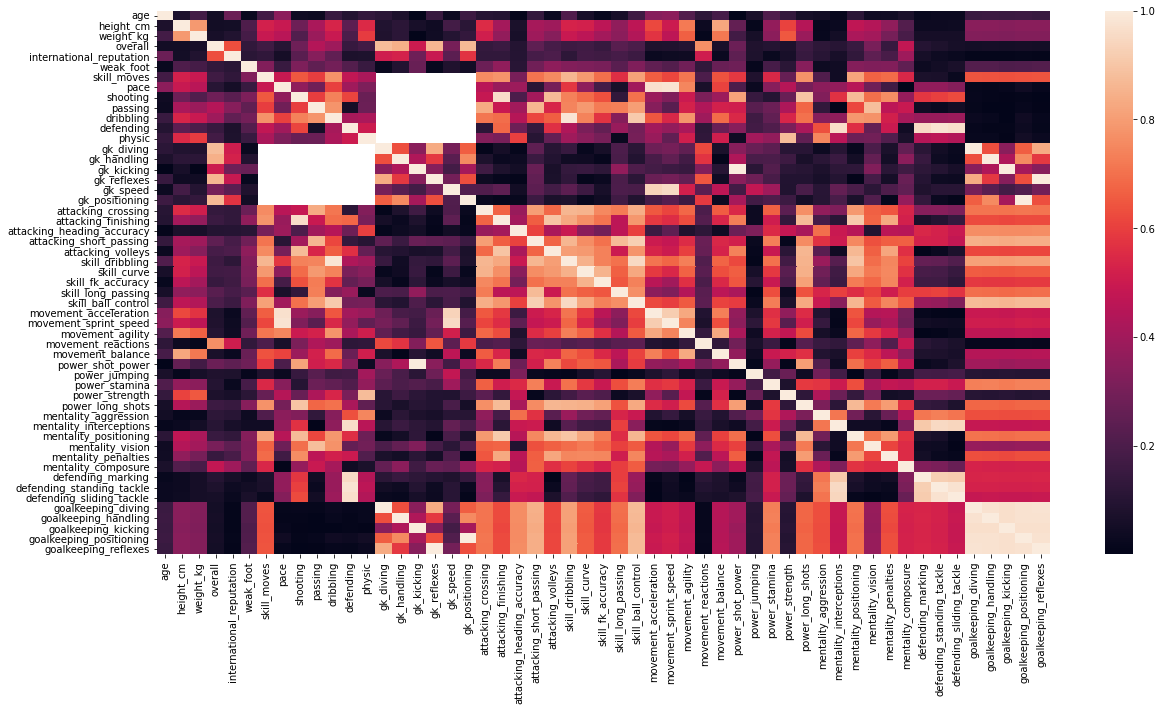

In [ ]:
# Plotting a heat map to detect correlated features
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

Goalkeeper features are correlated

In [ ]:
# Goalkeeper related features are perfectly correlated as seen by the white squares in the heatmap above. 
goalkeeper_features = ['gk_handling','gk_reflexes','gk_positioning','gk_diving','gk_kicking','gk_speed',\
                       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
data = data.drop(goalkeeper_features, axis = 1)
# Goalkeepers are a separate group and none of the main player skills apply to goalkeepers. We will assume this as a separate cluster and remove all goalkeepers from the dataset.

In [ ]:
data = data[data.player_positions !='GK']

Drop categorical features

In [ ]:
# PCA requires continuous features only and hence we will also drop all features that are categorical.
categorical_features = ['short_name','nationality','club','preferred_foot','player_positions','international_reputation','weak_foot','skill_moves']
data = data.drop(categorical_features, axis =1)
data = data.fillna(0)
data.shape

(5137, 39)

Building a Decision Tree Regressor to eliminate more correlated features using R2 score

In [ ]:
def features(data, feature, random_state, hc_feat):   #regression model is built on remaining features as the response, and all other features as predictors.
    new = data.drop(feature, axis = 1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new, data[feature], test_size = 0.20, random_state = random_state)

    from sklearn.tree import DecisionTreeRegressor  #Importing a decision tree regressor from Skikitlearn
    regressor = DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score =  regressor.score(X_test, y_test)
    if score >= 0.95:     #The R2 scores for response > 0.95 is considered as the variance in these features can be explained by the remaining variables and they do not add a lot of further information to our analysis.
        hc_feat.append(feature)
        print("R2 Score for feature {} is {}".format(feature, round(score,3) ))
    else:
        pass
    return hc_feat

In [ ]:
hc_feat = []
for key in data:
    features(data, key, random_state=13263600,hc_feat=hc_feat)

R2 Score for feature pace is 0.997
R2 Score for feature shooting is 0.984
R2 Score for feature passing is 0.957
R2 Score for feature dribbling is 0.982
R2 Score for feature defending is 0.99
R2 Score for feature physic is 0.956
R2 Score for feature attacking_finishing is 0.968
R2 Score for feature skill_dribbling is 0.966
R2 Score for feature movement_acceleration is 0.985
R2 Score for feature movement_sprint_speed is 0.99
R2 Score for feature defending_standing_tackle is 0.954


Dropping features with R2 score >= 0.95

In [ ]:
data = data.drop(hc_feat, axis = 1) #Since the R2 scores are so high, these features can be calculated using the other independent features, thus drop them.
print(data.shape)
data.head()

(5137, 28)


,age,height_cm,weight_kg,overall,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
0,32,170,72,94,88,70,92,88,93,94,92,96,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,26
1,34,187,83,93,84,89,83,87,81,76,77,92,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,24
2,27,175,68,92,87,62,87,87,88,87,81,95,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,29
4,28,175,74,91,81,61,89,83,83,79,83,94,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,22
5,28,181,70,91,93,55,92,82,85,83,91,91,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,51


# Feature Scaling and Transforming the data for PCA

Tweaked Dataset distribution

In [ ]:
data.describe()

,age,height_cm,weight_kg,overall,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
count,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000
mean,27.238466,180.846019,75.636948,74.111154,61.991435,63.390695,70.702939,54.812147,60.446759,54.202842,64.488417,71.441697,69.642788,71.002531,67.533969,68.626630,68.827720,72.396535,70.092272,60.560055,66.917656,57.048277,62.718123,63.685420,58.130816,69.945688,57.036208,54.375900
std,3.956364,6.577557,6.848237,3.774699,13.665833,11.807095,6.730381,15.634589,15.046577,15.943159,10.100465,7.548968,12.539995,5.719511,13.123799,10.985493,12.037265,10.093500,11.576747,14.857905,13.383629,19.804241,14.866945,12.294777,12.978836,7.029337,18.685654,21.101802
min,16.000000,156.000000,52.000000,70.000000,11.000000,20.000000,41.000000,11.000000,12.000000,10.000000,21.000000,33.000000,26.000000,50.000000,26.000000,15.000000,29.000000,29.000000,27.000000,12.000000,22.000000,10.000000,12.000000,13.000000,13.000000,32.000000,10.000000,10.000000
25%,24.000000,176.000000,71.000000,71.000000,55.000000,56.000000,67.000000,43.000000,51.000000,41.000000,59.000000,68.000000,63.000000,67.000000,60.000000,63.000000,62.000000,67.000000,63.000000,54.000000,59.000000,39.000000,56.000000,58.000000,49.000000,65.000000,41.000000,34.000000
50%,27.000000,181.000000,75.000000,73.000000,65.000000,65.000000,71.000000,58.000000,64.000000,56.000000,66.000000,72.000000,71.000000,71.000000,69.000000,71.000000,70.000000,73.000000,71.000000,65.000000,70.000000,66.000000,67.000000,66.000000,60.000000,70.000000,65.000000,64.000000
75%,30.000000,186.000000,80.000000,76.000000,72.000000,72.000000,75.000000,67.000000,72.000000,68.000000,71.000000,76.000000,78.000000,74.000000,76.000000,76.000000,77.000000,79.000000,78.000000,71.000000,76.000000,73.000000,73.000000,72.000000,68.000000,75.000000,72.000000,72.000000
max,41.000000,203.000000,101.000000,94.000000,93.000000,93.000000,92.000000,90.000000,94.000000,94.000000,92.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,95.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,90.000000


We perform log scaling as it gave the best results from the rest

In [ ]:
from sklearn.decomposition import PCA
def pca_results(data, n_components=8):
    #PCA model
    pca = PCA(n_components=n_components, random_state=1).fit(data)
    
    #DataFrame creation
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(data.columns))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    plt.legend(loc='upper right')

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # Return a concatenated DataFrame
    df = pd.concat([variance_ratios, components], axis = 1)
    print(f'Total Variance Explained by the first 2 dimensions: {df.iloc[:2,0].sum()}')
    return df

In [ ]:
log_data = np.log(data)

In [ ]:
def plot_transformed_data(data):
    plt.figure(figsize=(20,6))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
    plt.legend(loc='best');

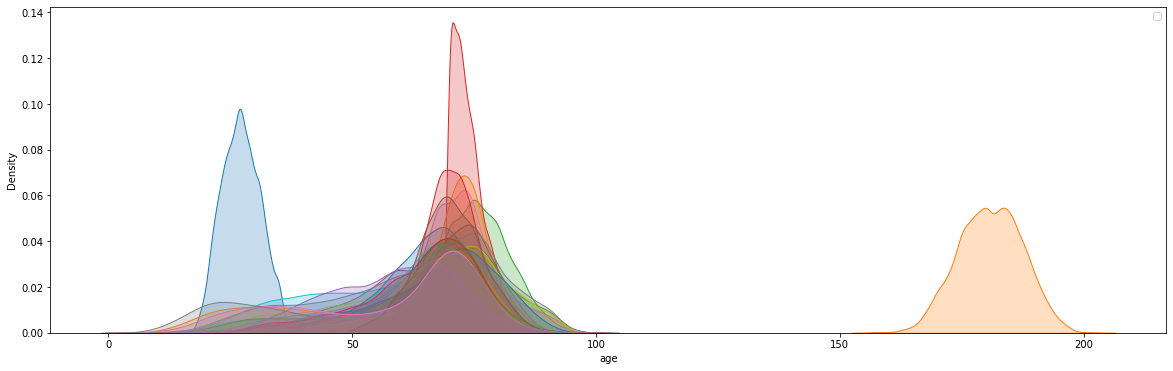

In [ ]:
plot_transformed_data(data)  #Unscaled data
# We can notice that the features are on different scales and most of the features are slightly left-skewed.

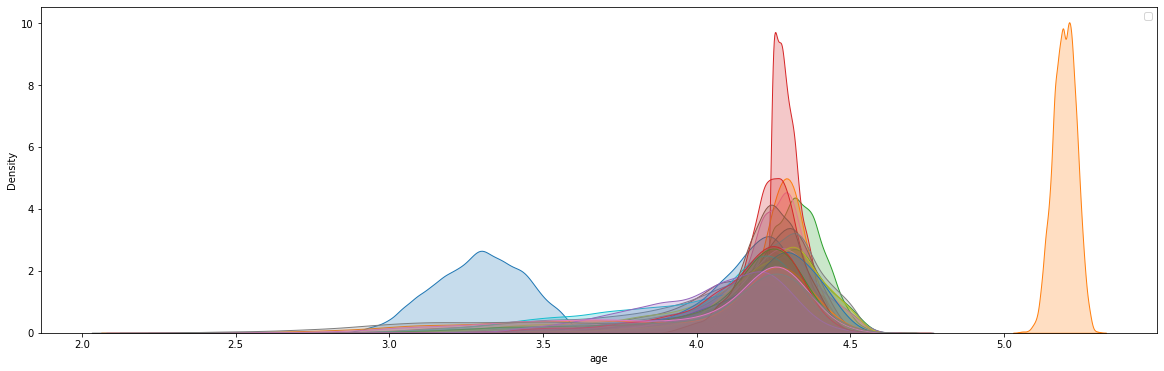

In [ ]:
plot_transformed_data(log_data)  #Scaled data using Log Scaling

Total Variance Explained by the first 2 dimensions: 0.6837


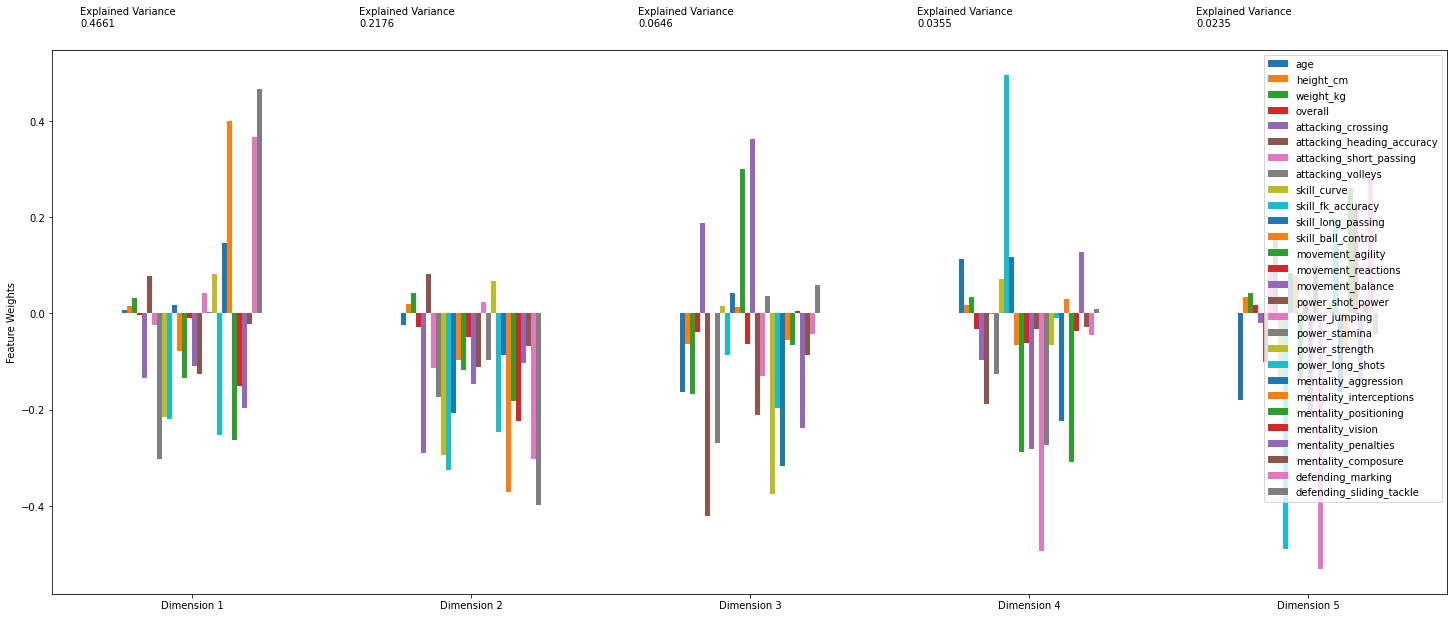

In [ ]:
pca_log = pca_results(log_data, 5)  #For every feature, the variance for every dimension is calculated. An average of this variance is taken finally.

# PCA Analysis

Making a Biplot for PCA analysis

In [ ]:
def make_pca(data, sample_ids):
    pca = PCA(n_components=2).fit(data)  #pca object that contains the components_ attribute
    reduced_data = pca.transform(log_data)  ## the first two dimensions are plotted
    pca_samples = pca.transform(log_data[log_data.index.isin(sample_ids)])
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
    return pca, reduced_data, pca_samples

In [ ]:
pca, reduced_data, pca_samples = make_pca(log_data, sample_ids = sample_generate(['CAM','CM']))

In [ ]:
def biplot(log_data, reduced_data, pca):  #Biplot shows the scatterplot of the reduced data and the projections of the original features.
    
    fig, ax = plt.subplots(figsize = (10,10))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)   
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 4.0, 3.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, log_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)
    
    ax.set_xlabel("Dimension 1 (PC1)", fontsize=14)
    ax.set_ylabel("Dimension 2 (PC2)", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

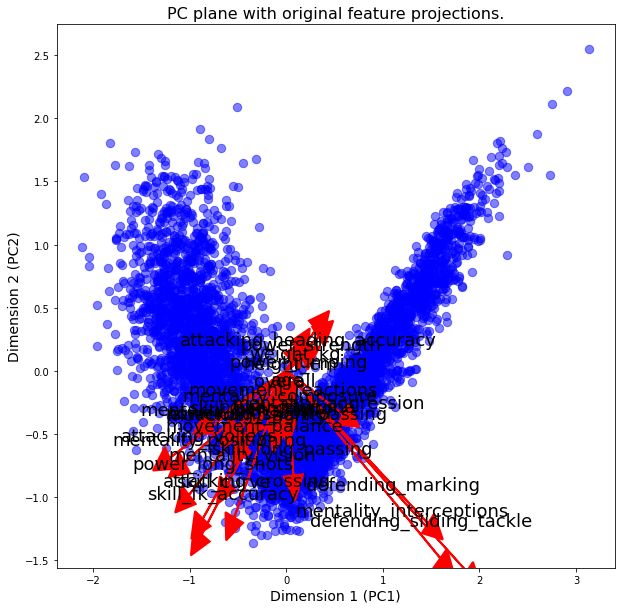

In [ ]:
biplot(log_data, reduced_data, pca);

# Clustering

Silhouette score to determine the no. of clusters

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def cluster(reduced_data,n_clusters,pca_samples=pca_samples):
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds

def silhouette_scorer(reduced_data,n_clusters):
    preds,_,_ = cluster(reduced_data,n_clusters)
    score = silhouette_score(reduced_data, preds)
    return score

for n_clusters in range(2,10):
    score = silhouette_scorer(reduced_data,n_clusters)
    print ("Silhoutte Score for {} cluster is {}".format(n_clusters,score))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 2 cluster is 0.4916710133782676


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 3 cluster is 0.532304043297347


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 4 cluster is 0.4685520162702666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 5 cluster is 0.4473965009074929


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 6 cluster is 0.41262103671240385


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 7 cluster is 0.39209057974112393


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 8 cluster is 0.3746540500116359


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 9 cluster is 0.3695507938601864


We receive the highest Silhouette Score of about 0.53 for three clusters

Elbow method to to determine the no. of clusters

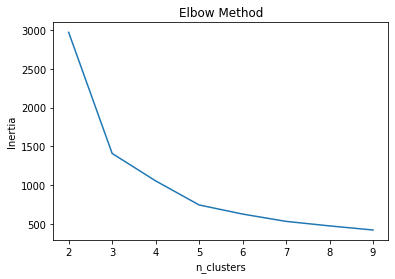

In [ ]:
inertia = []
clusters = range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    inertia.append(clusterer.inertia_)

plt.plot(clusters, inertia)
plt.ylabel('Inertia')
plt.xlabel('n_clusters')
plt.title('Elbow Method');

The value of K, which lies at the elbow of the curve plotted between the number of clusters and sum of distances between each point and its centroid.

The elbow of the curve appears at **3 clusters** thus concurring with the Silhouette score.

# Visualizing the clusters



In [ ]:
def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''
    import matplotlib.cm as cm
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

In [ ]:
copy_of_dataset.player_positions.unique()

array(['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB',
       'RM', 'LM', 'LWB', 'RWB'], dtype=object)

# Results

Forwards (Green cluster or Cluster 1)

Midfielders (Pink cluster or Cluster 2)

Defenders (Red cluster or Cluster 0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


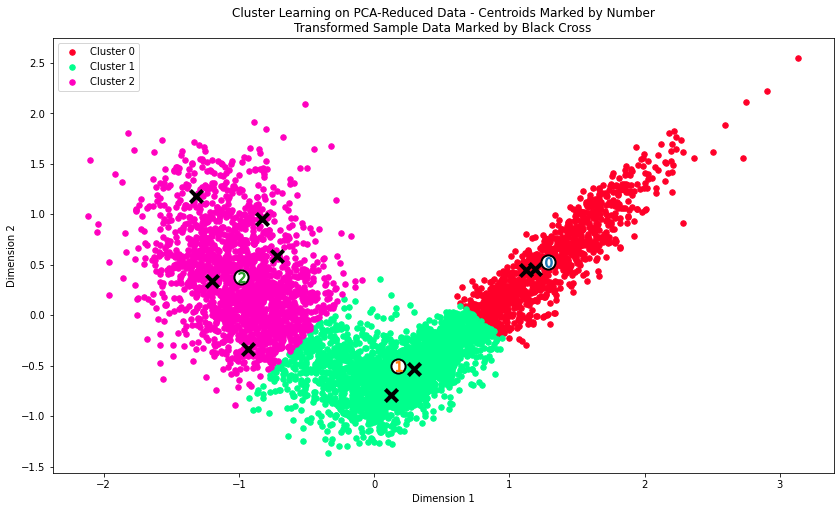

In [ ]:
sample_ids = sample_generate(['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

# Final Analysis

We should revisit the Biplot image from before in order to comprehend why K Means returned the clusters that it did.
It is clear when comparing the clusters and the feature vectors after the Biplot transfers the original features as vectors to the principal components.


Let's look at Cluster 0, also seen as the Red cluster, as an illustration. On the basis of the random samples, we have deduced that there are several defenders. Now, if we look at the Biplot, we can see that some of the feature vectors, such as defending_marking, mentality_interceptions, defending_sliding_tackle, have a significant impact along the direction of this cluster.

Similar to cluster 1, we can see that skill_long_passing, short_passing, power_stamina, mental_composure etc. are the most crucial characteristics. As a result, we can conclude that midfielders are the players that exhibit these qualities, and we can pinpoint the individuals in this group who are most suited for a midfielder position.

Finally, a forward player's primary responsibility is to score goals, so it goes without saying that the crucial characteristics in this regard are attacking, volleys, mentality_positioning, attacking_header_accuracy are a few of the important ones.